# ACP

### I. ACP Normé

##### 1.préparation de données

In [34]:
#importation des Bibliothèque
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# load les données
df = pd.read_csv('dataset_fin.csv')
df.head()

,Unnamed: 0,Reference area,GDP,TIME_PERIOD,Income,Expenditure,Components of aggregate demand,Production,Households,Government,Government expenditure by fun,Corporations,Capital,Economic_Classification
0,0,Australia,3.441992,2022,2.630387,6.318369,3.090439,3.665822,39871.843115,37.198877,37.198877,2.826235,102.959793,Emerging
1,1,Austria,5.277894,2022,0.676556,4.911191,2.438285,6.070283,40299.683652,53.010387,53.010387,3.702775,102.748410,Emerging
2,2,Belgium,4.233432,2022,0.945041,3.635884,1.815193,4.515443,36499.838230,52.240785,52.240785,5.092422,102.937581,Developing
3,3,Canada,4.189036,2022,5.478162,5.464745,2.960486,4.139944,34203.373443,41.238013,41.238013,6.555331,103.696381,Emerging
4,4,Chile,2.058740,2022,-1.181835,1.642339,1.019797,2.282649,16552.007381,27.749244,27.749244,4.490536,103.703984,Developing


In [36]:
# La Suprission Des Colonnes qui n'a pas de sence pour ce test 
data = df.drop(columns=['Economic_Classification' , 'TIME_PERIOD','Reference area','Unnamed: 0'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   GDP                             49 non-null     float64
 1   Income                          49 non-null     float64
 2   Expenditure                     49 non-null     float64
 3   Components of aggregate demand  49 non-null     float64
 4   Production                      49 non-null     float64
 5   Households                      49 non-null     float64
 6   Government                      49 non-null     float64
 7   Government expenditure by fun   49 non-null     float64
 8   Corporations                    49 non-null     float64
 9   Capital                         49 non-null     float64
dtypes: float64(10)
memory usage: 4.0 KB


##### 2.Centrage et Réduction


* But du centrage et réduction
Comparabilité des variables : Utile lorsque les variables sont sur des échelles différentes (exemple : revenu annuel en milliers d'euros et âge en années).

In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
X_scaled

array([[-9.75885570e-02,  1.86483445e-01,  4.31171754e-01,
         2.14276498e-01, -9.31344764e-02,  1.09626340e+00,
        -5.43547422e-01, -5.43547422e-01, -6.42121304e-01,
         1.59944833e-14],
       [ 7.55854816e-01, -2.11349144e-01, -7.34134753e-03,
        -1.46737244e-01,  1.03369782e+00,  1.14074261e+00,
         1.38094662e+00,  1.38094662e+00, -2.55298518e-01,
        -7.93046346e-02],
       [ 2.70322645e-01, -1.56681219e-01, -4.04760037e-01,
        -4.91663229e-01,  3.05033926e-01,  7.45702630e-01,
         1.28727471e+00,  1.28727471e+00,  3.57961301e-01,
        -8.33342334e-03],
       [ 2.49684736e-01,  7.66337947e-01,  1.65160500e-01,
         1.42338339e-01,  1.29058907e-01,  5.06957287e-01,
        -5.19249985e-02, -5.19249985e-02,  1.00355228e+00,
         2.76346145e-01],
       [-7.40611552e-01, -5.89748606e-01, -1.02600027e+00,
        -9.31971770e-01, -7.41347982e-01, -1.32811611e+00,
        -1.69370718e+00, -1.69370718e+00,  9.23451396e-02,
         2.


L'interprétation d'un centrage et réduction des données :

* Centrage :
  * Le centrage consiste à soustraire la moyenne de chaque variable à ses valeurs respectives. Cela permet d'assurer que chaque variable a une moyenne égale à 0.

  * Cela élimine les effets de l'échelle ou des niveaux initiaux des variables, permettant une meilleure comparaison.

* Réduction
  * La réduction consiste à diviser les valeurs centrées par l'écart-type de la variable. Cela donne une variance égale à 1 pour chaque variable.

  * Cela rend les variables comparables, surtout lorsqu'elles sont exprimées dans des unités ou des échelles différentes.

Le centrage et réduction mettent toutes les variables sur un pied d'égalité en termes d'échelle et de contribution à l'analyse, tout en éliminant les biais dus aux moyennes ou amplitudes initiales.

##### 3. Calcul de la Matrice de Corrélation

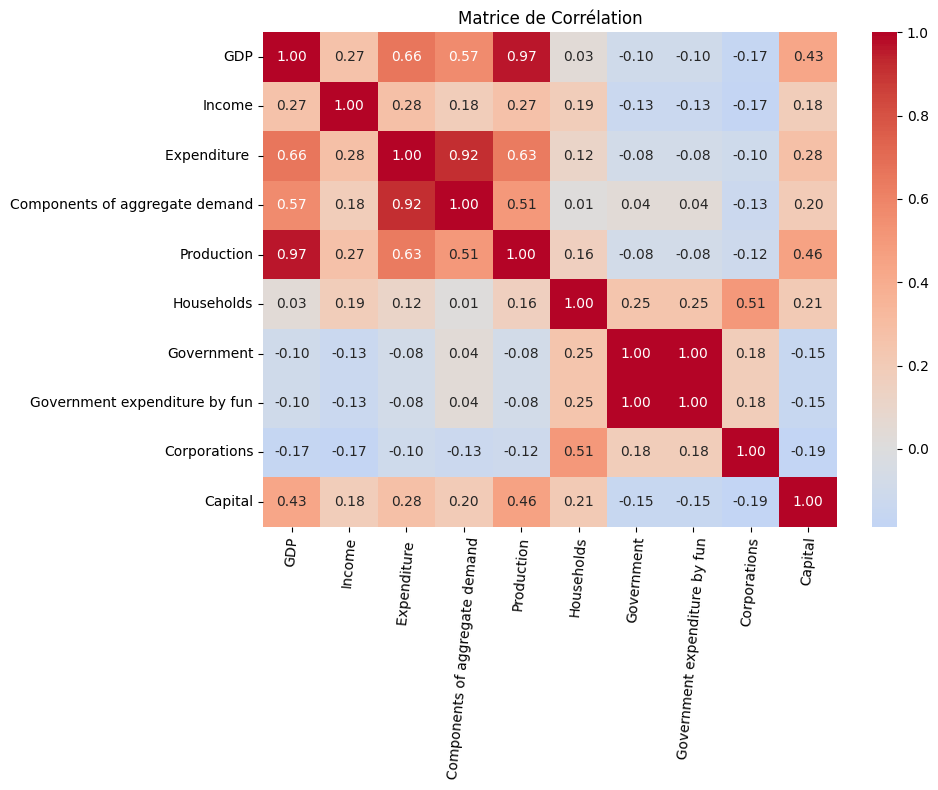

In [38]:
corr_matrix = np.corrcoef(X_scaled.T)
plt.figure(figsize=(10, 8))  # J'ai légèrement agrandi la figure pour une meilleure lisibilité
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap="coolwarm", 
            center=0, 
            fmt=".2f",
            xticklabels=data.columns,  # Ajout des noms des variables sur l'axe x
            yticklabels=data.columns)  # Ajout des noms des variables sur l'axe y
plt.title("Matrice de Corrélation")
plt.xticks(rotation=85)  # Rotation des labels pour une meilleure lisibilité
plt.yticks(rotation=0)
plt.tight_layout()  # Ajustement automatique de la mise en page
plt.show()

-> Ce graphique représente une matrice de corrélation, un outil statistique qui mesure la relation linéaire entre deux variables. Chaque valeur de corrélation est comprise entre -1 et 1.
Exemples spécifiques dans la matrice :

* GDP et Production : Corrélation très élevée (0.97), ce qui signifie que ces deux variables évoluent presque toujours ensemble.
* Expenditure et Components of aggregate demand : Corrélation forte (0.92), montrant une relation directe entre ces deux variables.
* GDP et Government : Corrélation faible ou négative (-0.10), ce qui suggère une relation inverse faible ou inexistante entre ces variables.
* Corporations et Capital : Corrélation négative modérée (-0.19), ce qui indique une faible relation inverse entre ces variables.


##### 5. Extraction des Valeurs Propres

* Les valeurs propres représentent la proportion de variance expliquée par chaque composante principale (CP).
* Les vecteurs propres représentent les coefficients (ou poids) associés à chaque variable pour former les composantes principales.

In [39]:
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)
eigenvalues_rounded = np.round(eigenvalues, 2)
eigenvectors_rounded = np.round(eigenvectors, 2)

print("Valeurs propres :", eigenvalues_rounded)
print("Vecteurs propres :\n", eigenvectors_rounded)

Valeurs propres : [ 3.55  2.23  1.34  1.    0.88  0.61  0.31  0.06  0.02 -0.  ]
Vecteurs propres :
 [[ 0.48  0.06 -0.04  0.05  0.24  0.45  0.01  0.18 -0.69  0.  ]
 [ 0.22 -0.03  0.22  0.38 -0.8   0.18  0.29  0.02  0.02  0.  ]
 [ 0.46  0.11 -0.1  -0.35 -0.17 -0.26 -0.05 -0.73 -0.11  0.  ]
 [ 0.4   0.15 -0.25 -0.38 -0.18 -0.37  0.08  0.64  0.15 -0.  ]
 [ 0.47  0.09  0.05  0.08  0.25  0.45 -0.13 -0.06  0.69 -0.  ]
 [ 0.05  0.38  0.62  0.04 -0.08 -0.18 -0.63  0.12 -0.09 -0.  ]
 [-0.13  0.6  -0.28  0.2  -0.01  0.02  0.07 -0.05 -0.    0.71]
 [-0.13  0.6  -0.28  0.2  -0.01  0.02  0.07 -0.05 -0.   -0.71]
 [-0.14  0.3   0.52 -0.48  0.11  0.18  0.58 -0.01  0.03 -0.  ]
 [ 0.29 -0.02  0.24  0.51  0.4  -0.54  0.38 -0.02  0.    0.  ]]


* Valeurs Porpres:
   * Interprétation :
      * La somme des valeurs propres est égale au nombre de variables (ici, 10).
      * Chaque valeur propre indique la quantité de variance expliquée par une composante principale.
      * Les premières composantes principales (celles avec les plus grandes valeurs propres) capturent la majorité de la variance.
* Vecteurs propres
   * Première composante principale (CP1) :
      * Poids associés : [0.48, 0.22, 0.46, 0.40, 0.47, 0.05, -0.13, -0.13, -0.14, 0.29].
         * Les coefficients les plus élevés en valeur absolue sont pour :
         GDP (0.48), Expenditure (0.46), Production (0.40), et Capital (0.47).
         * Interprétation : 
         La première composante principale est fortement influencée par des variables économiques globales telles que GDP, 
         Expenditure, Production et Capital.
   * Deuxième composante principale (CP2) :
      * Poids associés : [0.06, -0.03, 0.11, 0.15, 0.09, 0.38, 0.60, 0.60, 0.30, -0.02].
         * Les coefficients les plus élevés en valeur absolue sont pour :
           Households (0.38), Government expenditure by function (0.60) et Government (0.60).
         * Interprétation : La deuxième composante principale est dominée par les variables liées aux dépenses publiques et 
          aux ménages.

##### 5. Illustration des Composantes Principales

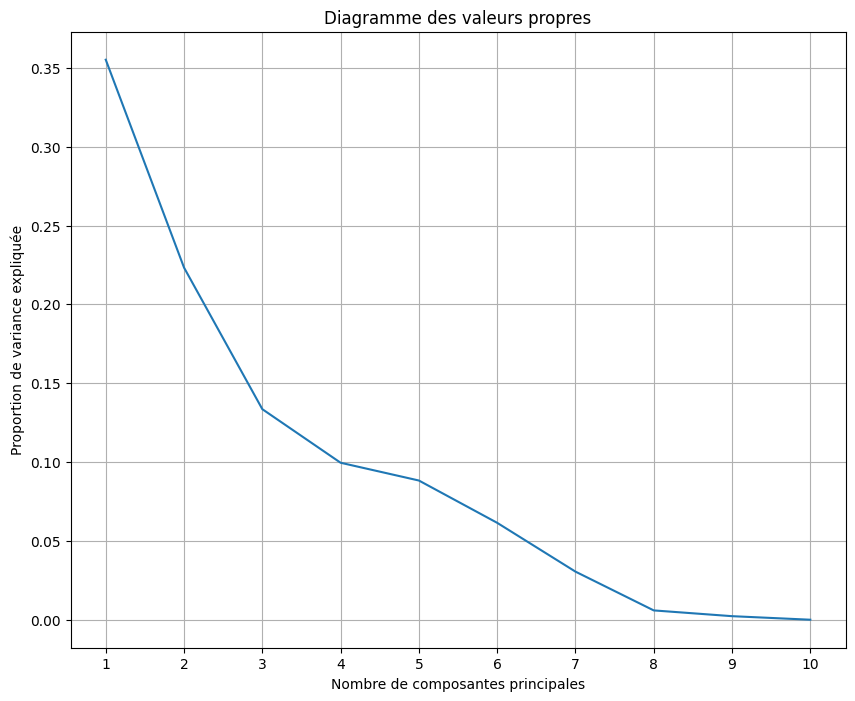

In [40]:
pca = PCA(n_components=len(data.columns))
pca.fit(X_scaled)

plt.figure(figsize=(10, 8))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Proportion de variance expliquée')
plt.title('Diagramme des valeurs propres')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.grid()
plt.show()

* Proportion de variance expliquée :

   * L'axe des ordonnées (y) représente la proportion de variance expliquée par chaque composante principale.
   * L'axe des abscisses (x) correspond au numéro de chaque composante principale.
   * La première composante principale (CP1) explique environ 35 % de la variance totale, la deuxième composante principale 
     (CP2) en explique 22 %, et ainsi de suite. La proportion diminue progressivement.

* Interprétation :
   * Le coudé (ou "elbow") du graphe, souvent visible comme un point d'inflexion, indique le nombre optimal de composantes 
     principales à retenir pour expliquer la majorité de la variance.
   * Dans ce cas, le coudé semble se situer autour de 3 ou 4 composantes principales.
     Cela signifie que les trois ou quatre premières composantes principales suffisent pour capturer l'essentiel de 
     l'information dans les données, avec une perte minimale de variance.

##### 6. Application de l'ACP

 1. On réduit les données à deux dimensions principales pour simplifier l'analyse

In [41]:
# Application de l'ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

2. Affichage des nouvelles données projetées sur les composantes principales.

In [42]:
print("Nouvelles données après ACP :")
print(X_pca)

Nouvelles données après ACP :
[[ 0.50982098 -0.36576929]
 [ 0.45012051  2.13869932]
 [-0.48589277  1.86147868]
 [ 0.46489928  0.47038334]
 [-1.24320125 -2.86223311]
 [ 0.29032314 -0.99417422]
 [ 3.19356006  1.09848103]
 [ 0.12765366 -0.6179487 ]
 [-1.55352125 -0.50338735]
 [-2.5219304  -0.24956917]
 [-1.94498734 -1.15340535]
 [-1.75011321 -0.25062765]
 [-1.82978417  0.54932118]
 [-2.27235429  1.21334875]
 [-2.48425106  2.89427292]
 [-1.34855796  1.38604186]
 [ 1.83382849  1.73237187]
 [ 0.28730662  0.82597903]
 [ 3.03785637  1.01596362]
 [ 2.4784406  -0.91168541]
 [ 1.74176256 -2.92927603]
 [ 4.5865618  -2.71552997]
 [ 2.98678698 -0.33096225]
 [ 0.04259219  2.08265855]
 [-2.35434928  0.2693077 ]
 [-1.01223594 -0.65596679]
 [-1.14497519 -0.36579242]
 [-1.46007709 -1.49992517]
 [-2.92462213  2.21869202]
 [ 0.60006767 -3.01741559]
 [ 0.90843117  0.86355092]
 [-1.03539351  0.08093819]
 [ 1.5517389  -0.72938509]
 [ 1.17407379 -0.13146785]
 [ 1.91160696  0.70366215]
 [-1.39071569 -0.50809811

* Interprétation :
   * Chaque ligne du tableau représente une observation dans les données transformées.
   * Les colonnes correspondent aux deux premières composantes principales :
      * CP1 (première colonne) : explique la plus grande proportion de la variance.
      * CP2 (deuxième colonne) : explique la deuxième plus grande proportion de la variance.

3.Visualisation des données dans l'espace des deux premières composantes principales.

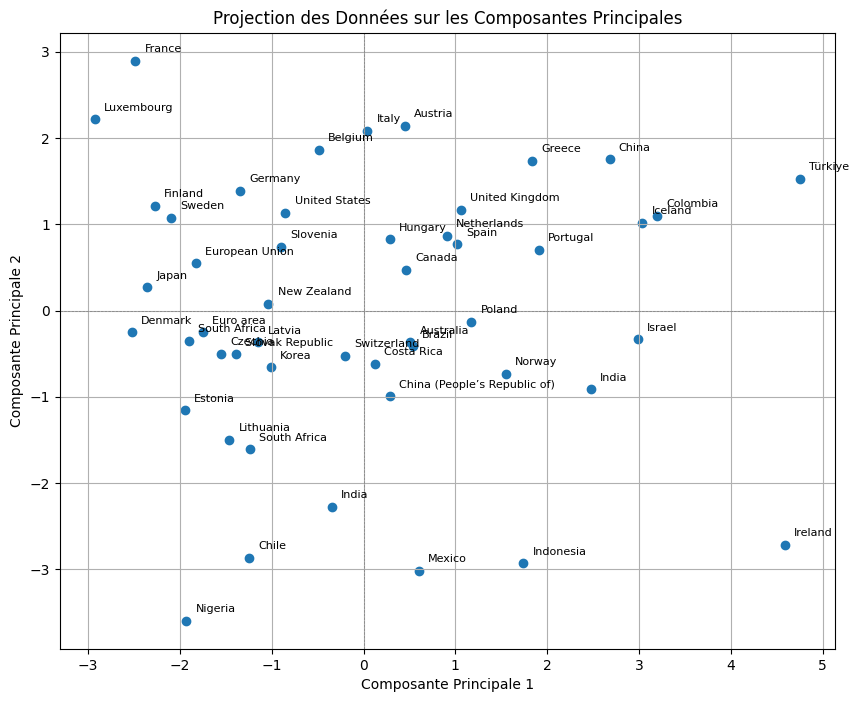

In [45]:
plt.figure(figsize=(10, 8))

# Convertir les noms des pays en une liste
countries = df['Reference area'].tolist()

# Créer le nuage de points
plt.scatter(X_pca[:, 0], X_pca[:, 1], label='Points')

# Ajouter les étiquettes pour chaque point
for i, country in enumerate(countries):
    plt.text(X_pca[i, 0] + 0.1, X_pca[i, 1] + 0.1, country, fontsize=8)

# Ajouter les éléments du graphique
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection des Données sur les Composantes Principales')
plt.grid()
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.show()


Le graphique montre la projection des pays sur les deux premières composantes principales (CP1 et CP2).
* Répartition générale :
  * Composante principale 1 (CP1) (axe horizontal) :
    Elle semble représenter une dimension liée à des différences structurelles majeures entre les pays. Les pays très à 
    droite (par exemple, Ireland) sont très distincts de ceux à gauche (comme Nigeria ou Chile).
  * Composante principale 2 (CP2) (axe vertical) :
    Elle capte une autre dimension, potentiellement liée à des caractéristiques secondaires (économiques, sociales ou 
    culturelles). Les pays en haut (par exemple, France, Luxembourg) se différencient fortement de ceux en bas (Mexico, 
    India).

* Pays similaires :
  France et Luxembourg se situent dans une zone proche sur le plan CP1-CP2, suggérant des caractéristiques similaires.
  South Africa, Lithuania, et Estonia forment un groupe dans la partie inférieure gauche.
* Pays distincts :
  Ireland (à l'extrême droite) est isolé sur CP1, suggérant qu'il se distingue nettement des autres pays.
  Nigeria (en bas à gauche) est également très éloigné des autres, indiquant des différences significatives.
* Pays proches du centre :
  Les pays comme Denmark, Euro area, et New Zealand sont proches du centre. Cela indique qu'ils sont relativement "neutres" 
  dans cet espace, sans caractéristiques extrêmes dans les deux premières composantes.


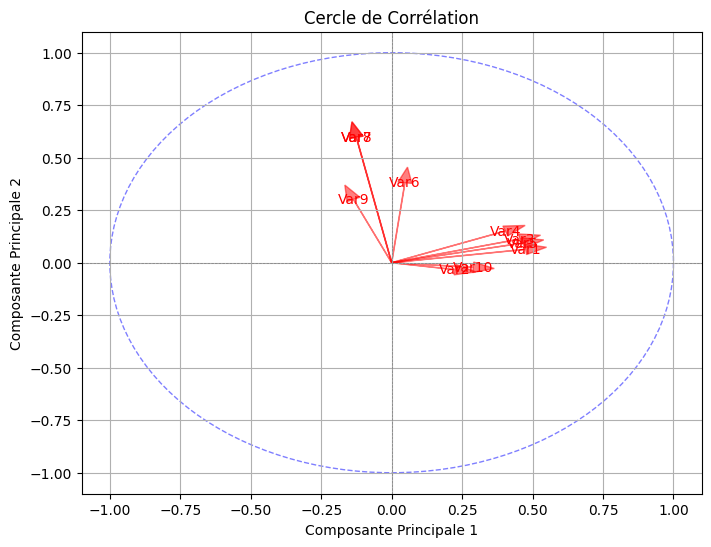

In [44]:
plt.figure(figsize=(8,6))
components = pca.components_
for i, (x, y) in enumerate(components.T):
    plt.arrow(0, 0, x, y, color='r', alpha=0.5, head_width=0.05)
    plt.text(x, y, f"Var{i+1}", color='r', ha='center', va='center')

# Tracer un cercle
circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--', alpha=0.5)
plt.gca().add_artist(circle)

# Ajuster les limites et ajouter des labels
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Cercle de Corrélation')
plt.grid()
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.show()